<a href="https://colab.research.google.com/github/sandeepsekarg/IITR-data-science-task-comment-to-likes/blob/main/IITR_comment2likes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import required libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Load dataset

In [ ]:
videos_df = pd.read_csv('videos-stats.csv')
comments_df = pd.read_csv('comments.csv')

In [ ]:
videos_df.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [ ]:
comments_df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


# Look for missing values and cleaning the data

In [ ]:
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1881 non-null   int64  
 1   Title         1881 non-null   object 
 2   Video ID      1881 non-null   object 
 3   Published At  1881 non-null   object 
 4   Keyword       1881 non-null   object 
 5   Likes         1879 non-null   float64
 6   Comments      1879 non-null   float64
 7   Views         1879 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.7+ KB


In [ ]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 719.2+ KB


In [ ]:
comments_df.drop("Unnamed: 0",axis=1,inplace=True)
videos_df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
videos_df.dropna(inplace=True)
videos_df.isnull().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

In [ ]:
comments_df.dropna(inplace=True)
comments_df.isnull().sum()

Video ID     0
Comment      0
Likes        0
Sentiment    0
dtype: int64

In [ ]:
videos_df.isin([-1]).sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           7
Comments        2
Views           0
dtype: int64

In [ ]:
videos_df = videos_df[videos_df.Likes.isin([-1]) == False]
videos_df = videos_df[videos_df.Comments.isin([-1]) == False]
videos_df.isin([-1]).sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

In [ ]:
comments_df.isin([-1]).sum()

Video ID     0
Comment      0
Likes        0
Sentiment    0
dtype: int64

In [ ]:
videos_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [ ]:
videos_df['Likes']=videos_df['Likes'].astype("int")
videos_df['Comments']=videos_df['Comments'].astype("int")
videos_df['Views']=videos_df['Views'].astype("int")

In [ ]:
videos_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644


In [ ]:
comments_df.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [ ]:
comments_df['comment_likes']= comments_df['Likes'].astype("int")
comments_df['Sentiment']= comments_df['Sentiment'].astype("int")
comments_df.head()

,Video ID,Comment,Likes,Sentiment,comment_likes
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1,95
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0,19
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2,161
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0,8
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2,34


In [ ]:
comments_df.drop('Likes',axis=1,inplace=True)

In [ ]:
comments_df.head()

,Video ID,Comment,Sentiment,comment_likes
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,1,95
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,0,19
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,2,161
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,0,8
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",2,34


#Save the cleaned data

In [ ]:
videos_df.to_csv('Cleaned_videos_data.csv', index = False)
comments_df.to_csv('Cleaned_comments_data.csv', index = False)

# Merge the datasets based on Video ID

In [ ]:
merged_df = pd.merge(videos_df, comments_df, on='Video ID')

In [ ]:
merged_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Comment,Sentiment,comment_likes
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Let's not forget that Apple Pay in 2014 requir...,1,95
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Here in NZ 50% of retailers don’t even have co...,0,19
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,I will forever acknowledge this channel with t...,2,161
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Whenever I go to a place that doesn’t take App...,0,8
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,"Apple Pay is so convenient, secure, and easy t...",2,34


##Save the merged dataset

In [ ]:
merged_df.to_csv('merged_data.csv', index = False)

#Data visualization

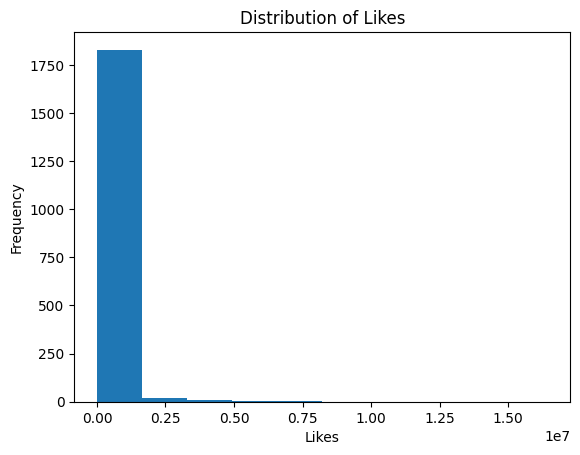

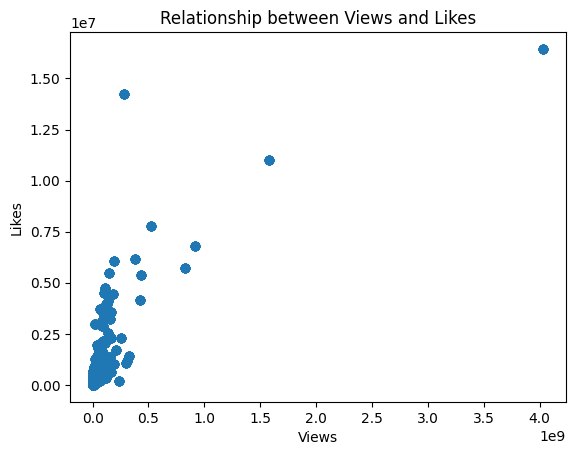

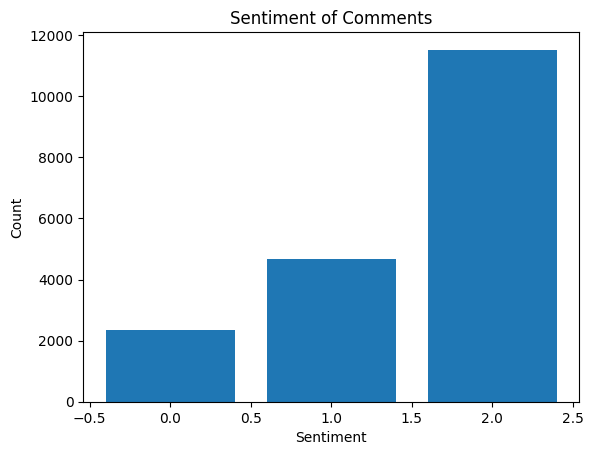

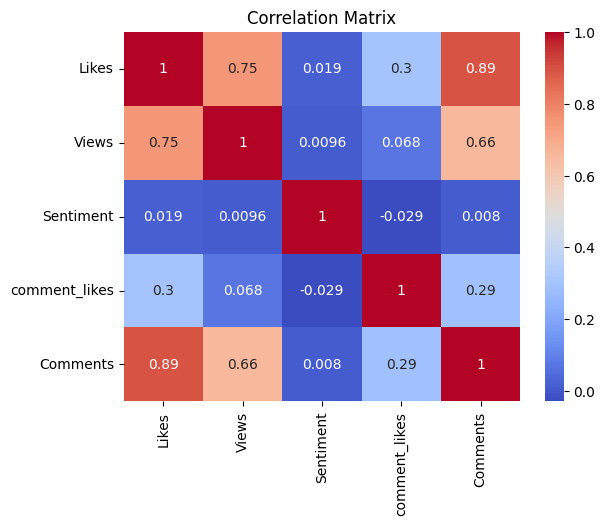

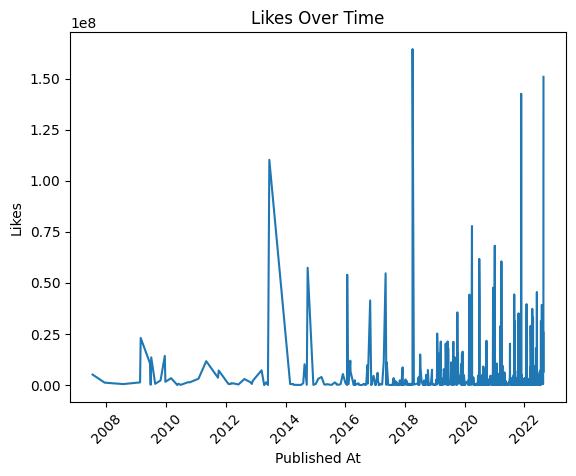

In [ ]:
# Data visualization examples

# 1. Histogram of Likes
plt.hist(videos_df['Likes'])
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

# 2. Scatter Plot of Views vs Likes
plt.scatter(merged_df['Views'], merged_df['Likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Relationship between Views and Likes')
plt.show()

# 3. Bar Chart of Sentiment
sentiment_counts = merged_df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment of Comments')
plt.show()

# 4. Correlation Matrix
correlation_matrix = merged_df[['Likes', 'Views', 'Sentiment', 'comment_likes', 'Comments']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Line Plot of Likes Over Time (assuming there's a 'Timestamp' column)
merged_df['Published At'] = pd.to_datetime(merged_df['Published At'])
likes_over_time = merged_df.groupby('Published At')['Likes'].sum()
plt.plot(likes_over_time.index, likes_over_time.values)
plt.xlabel('Published At')
plt.ylabel('Likes')
plt.title('Likes Over Time')
plt.xticks(rotation=45)
plt.show()


#Terminal Data preprocessing and feature engineering

In [ ]:
X = merged_df[['Comment', 'Sentiment', 'comment_likes', 'Views', 'Comments']]  # Input features
y = merged_df['Likes']  # Target variable

Convert 'Sentiment' column to numeric

In [ ]:
X.loc[:, 'Sentiment'] = pd.to_numeric(X['Sentiment'], errors='coerce')

<ipython-input-71-f27055deb1fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Sentiment'] = pd.to_numeric(X['Sentiment'], errors='coerce')


Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature extraction

In [ ]:
vectorizer = CountVectorizer()
X_train_comment = vectorizer.fit_transform(X_train['Comment'])
X_test_comment = vectorizer.transform(X_test['Comment'])

Convert other features to numeric arrays

In [ ]:
X_train_features = X_train.drop('Comment', axis=1).apply(pd.to_numeric)
X_test_features = X_test.drop('Comment', axis=1).apply(pd.to_numeric)

Create the feature matrix by combining comment text, sentiment, comment_likes, views, and comments

In [ ]:
X_train_features = hstack((X_train_comment, X_train_features.values.astype(np.float64))).tocsr()
X_test_features = hstack((X_test_comment, X_test_features.values.astype(np.float64))).tocsr()

# Model development

In [ ]:
model = LinearRegression()
model.fit(X_train_features, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train_features)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training RMSE:", train_rmse)

Training RMSE: 302819.9492859004


In [ ]:
y_test_pred = model.predict(X_test_features)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Testing RMSE:", test_rmse)

Testing RMSE: 345343.8593218462
